pip install xgboost

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
df1 = pd.read_csv("/Users/harithajayaraman/Documents/2nd-assignment-dmt-2020/training_set_VU_DM.csv")
df2 = pd.read_csv("/Users/harithajayaraman/Documents/2nd-assignment-dmt-2020/test_set_VU_DM.csv")

In [2]:
dfb_1 = df1[df1['booking_bool'] == 1].sample(5000)
dfb_0 = df1[df1['booking_bool'] == 0].sample(5000)
df = pd.concat([dfb_0, dfb_1])

In [3]:
#df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'
df.loc[(df['click_bool'] == 1) & (df['booking_bool'] == 1),'target'] = 1
df.loc[(df['click_bool'] == 0) & (df['booking_bool'] == 0),'target'] = 0
df.loc[(df['click_bool'] == 1) & (df['booking_bool'] == 0),'target'] = -1

In [4]:
df['prop_review_score']= df['prop_review_score'].fillna(df['prop_review_score'].median())
#dftest['prop_review_score']= dftest['prop_review_score'].fillna(dftest['prop_review_score'].median())

In [5]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [150]:
#df = df.set_index(['prop_country_id', 'prop_id'])

In [6]:
# The columns that we will be making predictions with.
X = df[['srch_id','site_id','visitor_location_country_id','prop_country_id','prop_id','prop_starrating','prop_review_score','prop_location_score1','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','prop_log_historical_price','price_usd','srch_destination_id']]
#X = ['srch_room_count','srch_length_of_stay','srch_booking_window','srch_destination_id','srch_children_count','srch_id','price_usd','prop_location_score1','visitor_location_country_id','prop_starrating','position','site_id','srch_adults_count','prop_review_score','prop_country_id, prop_id','prop_log_historical_price']
# The column that we want to predict.
y = df['target']
#including all the features
#X, y = df.iloc[:,:-1],df.iloc[:,-1]

In [61]:
group_srch_ids = pd.DataFrame(X_train['srch_id'].value_counts().reset_index())

In [62]:
group_srch_ids.columns = ['srch_id','count']

In [63]:
group_srch_ids.sort_values(by = 'srch_id', inplace=True)

In [64]:
group_counts = group_srch_ids['count'].to_numpy()

In [51]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
data_dmatrix.set_group(group_counts)

/Users/harithajayaraman/anaconda3/lib/python3.7/site-packages/xgboost/core.py:441: FutureWarning: Series.flags is deprecated and will be removed in a future version
  if not data.flags.c_contiguous:


In [67]:
group_srch_id2 = pd.DataFrame(X_val['srch_id'].value_counts().reset_index())

In [74]:
group_srch_id2.columns = ['srch_id','count']

In [75]:
group_srch_id2.sort_values(by = 'srch_id', inplace=True)

In [76]:
group_count2 = group_srch_id2['count'].to_numpy()

In [77]:
valid_dmatrix = xgb.DMatrix(data = X_val,label= y_val)
valid_dmatrix.set_group(group_count2)

In [53]:
#df1.set_index('position')

In [81]:
group_srch_id3 = pd.DataFrame(X_test['srch_id'].value_counts().reset_index())

In [82]:
group_srch_id3.columns = ['srch_id','count']

In [83]:
group_srch_id3.sort_values(by = 'srch_id', inplace=True)

In [84]:
group_count3 = group_srch_id2['count'].to_numpy()

In [85]:
test_dmatrix = xgb.DMatrix(data = X_test,label= y_test)
test_dmatrix.set_group(group_count3)

In [55]:
#from sklearn.model_selection import train_test_split
#X_train = df1[['srch_id','site_id','visitor_location_country_id','prop_country_id','prop_id','prop_starrating','prop_review_score','prop_location_score1','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','prop_log_historical_price','price_usd','srch_destination_id']]
#X_test = df2[['srch_id','site_id','visitor_location_country_id','prop_country_id','prop_id','prop_starrating','prop_review_score','prop_location_score1','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','prop_log_historical_price','price_usd','srch_destination_id']]
#y_train  = df1['target']
#y_test = df2[['target']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

In [88]:
params = {'objective': 'rank:ndcg', 'learning_rate': 0.01,
          'gamma': 1.0, 'min_child_weight': 0.1,
          'max_depth': 6, 'n_estimators': 500}
number_rounds = 50
model = xgb.train(params, data_dmatrix,number_rounds,early_stopping_rounds=10,
                evals=[(valid_dmatrix, 'validation')]) 
pred = model.predict(test_dmatrix,ntree_limit = bst.best_ntree_limit)


[21:27:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-map:0.99969
Will train until validation-map hasn't improved in 10 rounds.
[1]	validation-map:0.99937
[2]	validation-map:0.99937
[3]	validation-map:0.99937
[4]	validation-map:0.99937
[5]	validation-map:0.99937
[6]	validation-map:0.99937
[7]	validation-map:0.99937
[8]	validation-map:0.99937
[9]	validation-map:0.99937
[10]	validation-map:0.99937
Stopping. Best iteration:
[0]	validation-map:0.99969



XGBoostError: [21:27:05] /Users/travis/build/dmlc/xgboost/src/data/data.cc:353: Check failed: group_ptr_.back() == num_row_ (1600 vs. 2000) : Invalid group structure.  Number of rows obtained from groups doesn't equal to actual number of rows given by data.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000001a23741390 dmlc::LogMessageFatal::~LogMessageFatal() + 112
  [bt] (1) 2   libxgboost.dylib                    0x0000001a23787f77 xgboost::MetaInfo::Validate(int) const + 1063
  [bt] (2) 3   libxgboost.dylib                    0x0000001a237ee926 xgboost::LearnerImpl::ValidateDMatrix(xgboost::DMatrix*) const + 54
  [bt] (3) 4   libxgboost.dylib                    0x0000001a237eeaf3 xgboost::LearnerImpl::PredictRaw(xgboost::DMatrix*, xgboost::PredictionCacheEntry*, bool, unsigned int) const + 67
  [bt] (4) 5   libxgboost.dylib                    0x0000001a237df09c xgboost::LearnerImpl::Predict(std::__1::shared_ptr<xgboost::DMatrix>, bool, xgboost::HostDeviceVector<float>*, unsigned int, bool, bool, bool, bool, bool) + 732
  [bt] (5) 6   libxgboost.dylib                    0x0000001a2373a2ca XGBoosterPredict + 266
  [bt] (6) 7   libffi.6.dylib                      0x000000011036e884 ffi_call_unix64 + 76



In [89]:
pred

,srch_id,prop_id,predprob
0,1,3180,0.417952
1,1,5543,0.444801
2,1,14142,0.492379
3,1,22393,0.461346
4,1,24194,0.432747
5,1,28181,0.437132
6,1,34263,0.431853
7,1,37567,0.471573
8,1,50162,0.494815
9,1,54937,0.434761


In [ ]:
pred_sort = pred.sort_values("srch_id",ascending=True)

In [ ]:
pred_sort = pred_sort.drop(columns =  ['predprob'])

In [ ]:
pred_sort.to_csv('/Users/harithajayaraman/Documents/2nd-assignment-dmt-2020/submission_rank.csv', index=False)

In [41]:
#tuning
xg_reg = xgb.XGBClassifier(objective ='rank:pairwise', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 5, alpha = 10, n_estimators = 500)

In [42]:
xg_reg.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
preds = xg_reg.predict(X_test)

In [171]:
predprob.dtype

dtype('float32')

In [44]:
test = df2[['srch_id','site_id','visitor_location_country_id','prop_country_id','prop_id','prop_starrating','prop_review_score','prop_location_score1','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','prop_log_historical_price','price_usd','srch_destination_id']]

In [45]:
predprob = xg_reg.predict_proba(test)

In [15]:
len(predprob)

4959183

In [200]:
#Finding out uniques instances of srch_id
u, c = np.unique(df1['srch_id'], return_counts=True)
u


array([     1,      4,      6, ..., 332782, 332784, 332785])

In [46]:
unique_srchids = list(df['srch_id'].unique())

In [90]:
pred = pd.DataFrame()
pred['srch_id'] = df2['srch_id']
pred['prop_id'] = df2['prop_id']
pred['predprob'] = predprob[:,1]
pred_sort = pd.DataFrame()
#A10_sort = pd.DataFrame()
# Sort
for i in unique_srchids:
    pred_sort = pd.concat([pred_sort,pred.loc[pred['srch_id']==i].sort_values(by='predprob',ascending=False)])

KeyboardInterrupt: 

In [16]:
#pred_sor = pred.sort_values("predprob",ascending = False)

In [35]:
pred_sort

In [91]:
pred_sort = pred.sort_values("srch_id",ascending=True)

In [92]:
pred_sort = pred_sort.drop(columns =  ['predprob'])

In [93]:
pred_sort

,srch_id,prop_id
0,1,3180
28,1,139162
27,1,134992
26,1,128871
25,1,128085
24,1,123675
23,1,99484
22,1,95031
21,1,94729
19,1,89466


In [94]:
pred_sort = pred_sort.to_csv('/Users/harithajayaraman/Documents/2nd-assignment-dmt-2020/submission_rank.csv', index=False)

In [40]:
pred_sort

In [74]:
#df[pre]

#order = np.argsort(predprob, axis=1)
#print(order)

[[0 1 2]
 [2 0 1]
 [2 0 1]
 ...
 [0 1 2]
 [2 0 1]
 [2 0 1]]


In [69]:
xg_reg.score(X_train,y_train)

0.993

['position',
 'srch_id',
 'site_id',
 'visitor_location_country_id',
 'prop_country_id',
 'prop_id',
 'prop_starrating',
 'prop_review_score',
 'prop_location_score1',
 'srch_length_of_stay',
 'srch_booking_window',
 'srch_adults_count',
 'srch_children_count',
 'srch_room_count',
 'prop_log_historical_price',
 'price_usd',
 'srch_destination_id']

In [12]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.580086


In [24]:
#Tuning Learning Rate in XGBoost
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(df[X], df[y])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('learning_rate.png')

/Users/harithajayaraman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/harithajayaraman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: -0.625613 using {'learning_rate': 0.1}
-1.092645 (0.000167) with: {'learning_rate': 0.0001}
-1.042994 (0.001513) with: {'learning_rate': 0.001}
-0.777782 (0.010577) with: {'learning_rate': 0.01}
-0.625613 (0.018047) with: {'learning_rate': 0.1}
-0.647659 (0.020015) with: {'learning_rate': 0.2}
-0.673267 (0.026948) with: {'learning_rate': 0.3}


In [25]:
#Tuning Learning Rate and the Number of Trees in XGBoost
# XGBoost on Sample dataset, Tune learning_rate and n_estimators
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
import numpy
# grid search
model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(df[X], df[y])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_learning_rate.png')

/Users/harithajayaraman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/harithajayaraman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: -0.623974 using {'learning_rate': 0.01, 'n_estimators': 500}
-1.092645 (0.000167) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-1.086778 (0.000334) with: {'learning_rate': 0.0001, 'n_estimators': 200}
-1.081001 (0.000490) with: {'learning_rate': 0.0001, 'n_estimators': 300}
-1.075311 (0.000641) with: {'learning_rate': 0.0001, 'n_estimators': 400}
-1.069713 (0.000785) with: {'learning_rate': 0.0001, 'n_estimators': 500}
-1.042994 (0.001513) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.995063 (0.002898) with: {'learning_rate': 0.001, 'n_estimators': 200}
-0.953776 (0.004188) with: {'learning_rate': 0.001, 'n_estimators': 300}
-0.917964 (0.005473) with: {'learning_rate': 0.001, 'n_estimators': 400}
-0.886686 (0.006591) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.777782 (0.010577) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.682660 (0.014784) with: {'learning_rate': 0.01, 'n_estimators': 200}
-0.646917 (0.016371) with: {'learning_rate': 0.01, 'n_

In [40]:
#K-fold cross validation using XGBoost
params = {"objective":"rank:pairwise",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

NameError: name 'pred' is not defined

In [14]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.506024,0.001403,0.506412,0.003008
1,0.502667,0.005124,0.503460,0.000683
2,0.499406,0.004695,0.500418,0.002870
3,0.495744,0.001653,0.497155,0.002843
4,0.495241,0.001642,0.496889,0.002787


In [15]:
print((cv_results["test-rmse-mean"]).tail(1))
#less rmse compared to before optimization

49    0.460597
Name: test-rmse-mean, dtype: float64


In [16]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[11:26:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [16]:
conda install graphviz

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::anaconda==2019.07=py37_0
  - defaults/osx-64::numba==0.44.1=py37h6440ff4_0
done

## Package Plan ##

  environment location: /Users/harithajayaraman/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |       hc4e6be7_4         860 KB
    conda-4.8.3                |           py37_0         2.8 MB
    fontconfig-2.13.0          |       h5d5b041_1         202 KB
    fribidi-1.0.5              |       h1de35cc_0          60 KB
    graphite2-1.3.13           |       h2098e52_0          80 KB
    graphviz-2.40.1            |       hefbbd9a_2         6.3 MB
    harfbuzz-1.8.8             |       hb8d4a28_0         414 KB
    pango-1.42.4          

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

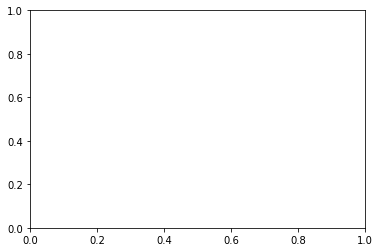

In [17]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

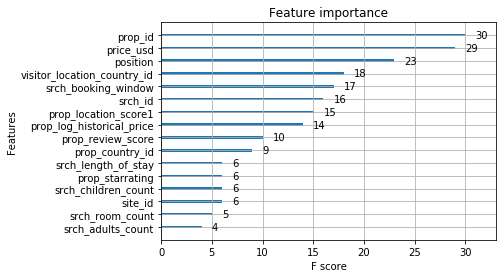

In [18]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [25]:
df.dtypes

srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
srch_query_affinity_score      float64
orig_destination_distance

In [30]:
#pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
df['date_time'] = pd.DatetimeIndex(df['date_time']).month
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,target
2413677,162084,4,5,219,NaN,NaN,219,29479,3,4.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,0.0
2964240,199081,6,14,100,NaN,NaN,100,34221,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0.0
4118844,276335,3,14,100,NaN,NaN,100,27665,3,4.0,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,0.0
1473705,98817,5,5,219,NaN,NaN,50,28826,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0.0
39234,2605,6,5,219,NaN,NaN,134,105863,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0.0


In [ ]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
# The columns that we will be making predictions with.
#X = df['srch_id','date_time','site_id','visitor_location_country_id','visitor_hist_starrating','visitor_hist_adr_usd','prop_country_id','prop_id','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_destination_id','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','comp1_rate','comp1_inv','comp1_rate_percent_diff','comp2_rate','comp2_inv','comp2_rate_percent_diff','comp3_rate','comp3_inv','comp3_rate_percent_diff','comp4_rate','comp4_inv','comp4_rate_percent_diff','comp5_rate','comp5_inv','comp5_rate_percent_diff','comp6_rate','comp6_inv','comp6_rate_percent_diff','comp7_rate','comp7_inv','comp7_rate_percent_diff','comp8_rate','comp8_inv','comp8_rate_percent_diff','click_bool','gross_bookings_usd','booking_bool']
# The column that we want to predict.
#y = df['target']
X, y = df.iloc[:,:-1],df.iloc[:,-1]
print(X.columns)
print(y.shape)
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.28222
Feature: 1, Score: 0.04496
Feature: 2, Score: 0.03736
Feature: 3, Score: 0.03803
Feature: 4, Score: 0.03967
Feature: 5, Score: 0.04409
Feature: 6, Score: 0.04497
Feature: 7, Score: 0.06431
Feature: 8, Score: 0.04836
Feature: 9, Score: 0.04497
Feature: 10, Score: 0.04609
Feature: 11, Score: 0.03505
Feature: 12, Score: 0.04163
Feature: 13, Score: 0.04831
Feature: 14, Score: 0.04371
Feature: 15, Score: 0.05175
Feature: 16, Score: 0.04450


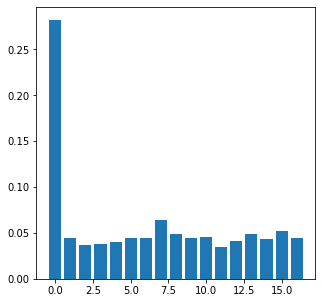

In [35]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
# The columns that we will be making predictions with.
X = ['position','srch_id','site_id','visitor_location_country_id','prop_country_id','prop_id','prop_starrating','prop_review_score','prop_location_score1','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','prop_log_historical_price','price_usd','srch_destination_id']
# The column that we want to predict.
y = ['target']
#X, y = df.iloc[:,:-1],df.iloc[:,-1]
# define the model
model = XGBClassifier()
# fit the model
model.fit(df[X], df[y])
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

NameError: name 'group_train' is not defined